<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
#Import selutuh library yang diperlukan
import pandas as pd #preprocessing dan data analisis
#visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
#memisahkan dataset menjadi data test dan data train 
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier #algoritma klasifikasi
from sklearn.metrics import accuracy_score #melihat tingkat akurasi model KNN 
from sklearn.metrics import classification_report, confusion_matrix #membuat report tentang metriks klasifikasi.

In [178]:
data = pd.read_csv('data stroke.csv') #membaca data .csv
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2033,60126,Female,79.0,0,0,Yes,Private,Urban,68.37,24.2,smokes,0
2034,64393,Male,56.0,0,0,No,Self-employed,Rural,87.95,25.2,never smoked,0
2035,69285,Female,45.0,0,0,Yes,Private,Urban,73.27,22.2,smokes,0
2036,24428,Male,6.0,0,0,No,children,Rural,131.43,17.7,Unknown,0


In [179]:
#Menampilkan ukuran data
print("Ukuran data adalah", data.shape)

Ukuran data adalah (2038, 12)


In [180]:
#Menampilkan info dan deskripsi dataset
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2038 non-null   int64  
 1   gender             2038 non-null   object 
 2   age                2038 non-null   float64
 3   hypertension       2038 non-null   int64  
 4   heart_disease      2038 non-null   int64  
 5   ever_married       2038 non-null   object 
 6   work_type          2038 non-null   object 
 7   Residence_type     2038 non-null   object 
 8   avg_glucose_level  2038 non-null   float64
 9   bmi                1932 non-null   float64
 10  smoking_status     2038 non-null   object 
 11  stroke             2038 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 191.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,1932.000000,2038.000000
mean,36098.331207,45.198724,0.110402,0.064769,108.737910,29.196170,0.122179
std,20960.249890,22.796385,0.313468,0.246179,47.327665,7.839212,0.327572
min,84.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,17362.750000,27.000000,0.000000,0.000000,77.862500,23.800000,0.000000
50%,36231.000000,48.000000,0.000000,0.000000,93.290000,28.300000,0.000000
75%,53865.750000,63.000000,0.000000,0.000000,117.862500,33.425000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,78.000000,1.000000


In [181]:
#Preprocessing data
print("Sebelum Preprocessing")
print(data.isnull().sum()) #Menampilkan jumlah data yang bernilai null untuk masing-masing kolom
data_clean=data.dropna(axis=0) #Menghapus data yang bernilai null
print("\nSetelah Preprocessing")
print(data_clean.isnull().sum()) #Menampilkan jumlah data yang bernilai null untuk masing-masing kolom
print("Jumlah data duplikat" ,data_clean.duplicated().sum()) #Menampilkan jumlah data duplikat

Sebelum Preprocessing
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  106
smoking_status         0
stroke                 0
dtype: int64

Setelah Preprocessing
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Jumlah data duplikat 0


In [182]:
# Menghapus kolom yang tidak diperlukan dalam analisis
data = data.drop(["id", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi"], axis=1)

# Menampilkan hasil preprocessing data
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_status',
       'stroke'],
      dtype='object')

In [183]:
# Konversi nilai data strin menjadi nilai angka

# Fungsi mengubah data jenis kelamin
def gender(value1):
  if value1 == "Female":
    return 0
  elif value1 == "Male":
    return 1

data_clean['gender'] = data_clean['gender'].apply(gender)
display(data_clean['gender'])

# Fungsi mengubah data status merokok
def smoking_status(value):
  if value == "formerly smoked":
    return 0
  elif value == "never smoked":
    return 1
  elif value == "smokes":
    return 2
  elif value == "Unknown":
    return 3

data_clean['smoking_status'] = data_clean['smoking_status'].apply(smoking_status)
display(data_clean['smoking_status'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0       1
2       1
3       0
4       0
5       1
       ..
2033    0
2034    1
2035    0
2036    1
2037    0
Name: gender, Length: 1932, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       0
2       1
3       2
4       1
5       0
       ..
2033    2
2034    1
2035    2
2036    3
2037    1
Name: smoking_status, Length: 1932, dtype: int64

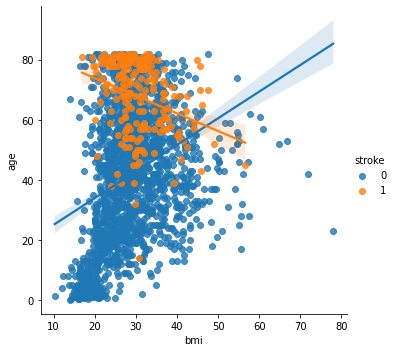

In [184]:
# EDA (Exploring Data Analysis)
sns.lmplot(x = 'bmi', y = 'age', hue = 'stroke', data = data_clean)

In [185]:
#Menentukan variabel dependen dan independen
x = data_clean[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_status']]
y = data_clean['stroke']
print(x)
print(y)

      gender   age  hypertension  heart_disease  smoking_status
0          1  67.0             0              1               0
2          1  80.0             0              1               1
3          0  49.0             0              0               2
4          0  79.0             1              0               1
5          1  81.0             0              0               0
...      ...   ...           ...            ...             ...
2033       0  79.0             0              0               2
2034       1  56.0             0              0               1
2035       0  45.0             0              0               2
2036       1   6.0             0              0               3
2037       0  45.0             0              0               1

[1932 rows x 5 columns]
0       1
2       1
3       1
4       1
5       1
       ..
2033    0
2034    0
2035    0
2036    0
2037    0
Name: stroke, Length: 1932, dtype: int64


In [186]:
#Melakukan training dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [187]:
#Mengimplementasikan algoritma KNN
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [188]:
#Membuat moddel prediksi
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
#Menentukan probabilitas hasil prediksi
knn.predict_proba(x_test)

array([[0.3, 0.7],
       [1. , 0. ],
       [0.8, 0.2],
       ...,
       [0.5, 0.5],
       [0.9, 0.1],
       [1. , 0. ]])

In [190]:
#Membuat skor akurasi
print(accuracy_score(y_test, y_pred))

0.8913793103448275


In [191]:
#Melihat akurasi data hasil prediksi dengan data aktual
print(confusion_matrix(y_test, y_pred)) #classification_report digunakan untuk membuat report ttg metriks klasifikasi
print(classification_report(y_test, y_pred)) #menampilkan matriks hasil prediksi

[[512   5]
 [ 58   5]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       517
           1       0.50      0.08      0.14        63

    accuracy                           0.89       580
   macro avg       0.70      0.53      0.54       580
weighted avg       0.85      0.89      0.85       580



In [192]:
#Cross Validation
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score

for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

Nilai neighbors yang optimal adalah  45 


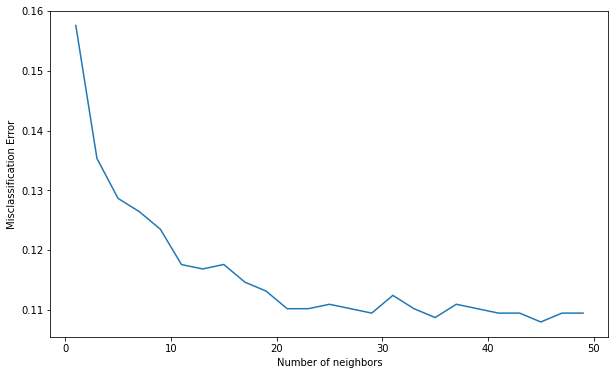

In [193]:
#missclasification
MSE = [1-x for x in cv_scores]
  
optimal_k = neighbors[MSE.index(min(MSE))]
print('Nilai neighbors yang optimal adalah % d ' % optimal_k)
  
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [194]:
import numpy as np
#mencari tahu nilai K berapa yang akan menghasilkan akurasi tinggi dengan menggunakan grafik pilot
error = []
#mengitung eror untuk K dengan nilai antara 1 sampai 100
for i in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

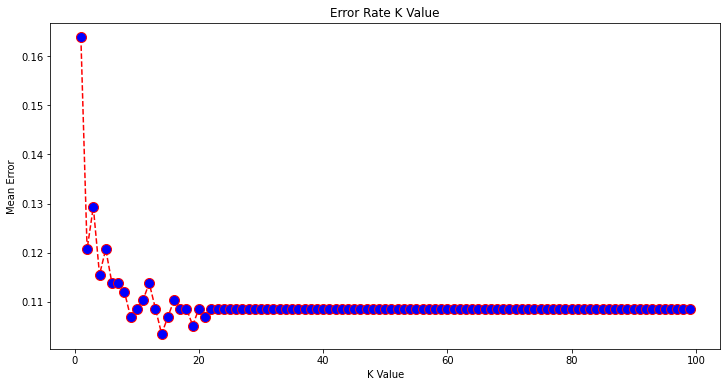

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')